### 모듈 임포트

In [1]:
#built-in
import datetime as dt

#thrid-party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
from sklearn.preprocessing import scale, minmax_scale

#model
from sklearn.cluster import KMeans

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#시각화
from sklearn.manifold import TSNE

In [2]:
plt.rcParams['figure.figsize'] = (30,8)

### 파생변수 만들기

In [3]:
def cal_MAX(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).max()
    return new[v.dstIp]

In [4]:
def cal_MEAN(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).mean()
    return new[v.dstIp]

In [5]:
def minus_Min_Max(v, data):
    temp = data[data.index < v.name]
    temp = temp[temp.dstIp == v.dstIp]
    temp = temp.iloc[-60:,:]
    return temp.len.max() - temp.len.min()

In [6]:
def cal_VAR(v, data):
    temp = data[data.index < v.name]
    temp = temp[temp.dstIp == v.dstIp]
    temp = temp.iloc[-10:,:]
    return np.std(temp.len)

### 데이터 로드

In [7]:
raw_data = pd.read_excel('./data/export3.xlsx')

In [8]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'])

### 데이터 선처리

###### 영상데이터 라벨링

In [9]:
raw_data['label'] = 0

#cctv
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 15:54:00') & (raw_data['timestamp'] <= '2018-10-14 15:57:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:04:00') & (raw_data['timestamp'] <= '2018-10-14 16:07:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:14:00') & (raw_data['timestamp'] <= '2018-10-14 16:17:30'), 'label'] = 1

#etc
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:24:00') & (raw_data['timestamp'] <= '2018-10-14 16:31:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:39:00') & (raw_data['timestamp'] <= '2018-10-14 16:46:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:54:00') & (raw_data['timestamp'] <= '2018-10-14 17:01:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 17:09:00') & (raw_data['timestamp'] <= '2018-10-14 17:16:00'), 'label'] = 2

###### 피처 추출

In [10]:
data = raw_data

In [11]:
#count max
data['cnt_max'] = data.apply(lambda v: cal_MAX(v, data), axis = 1)

#count mean
data['cnt_mean'] = data.apply(lambda v: cal_MEAN(v, data), axis = 1)

#max / mean
data['cnt_max_devide_mean'] = data['cnt_max'] / (data['cnt_mean'] + 0.00000001)

#null 처리
data = data.fillna(0)

###### 히스토그램

In [14]:
data.head(0)

,dstIp,srcPort,dstPort,srcIp,proto,ipLenCount,len,cnt,ipLenMean,timestamp,label,cnt_max,cnt_mean,cnt_max_devide_mean


In [22]:
pd.crosstab(index=data.label, columns='cnt')

col_0,cnt
label,
0,4848
1,2950


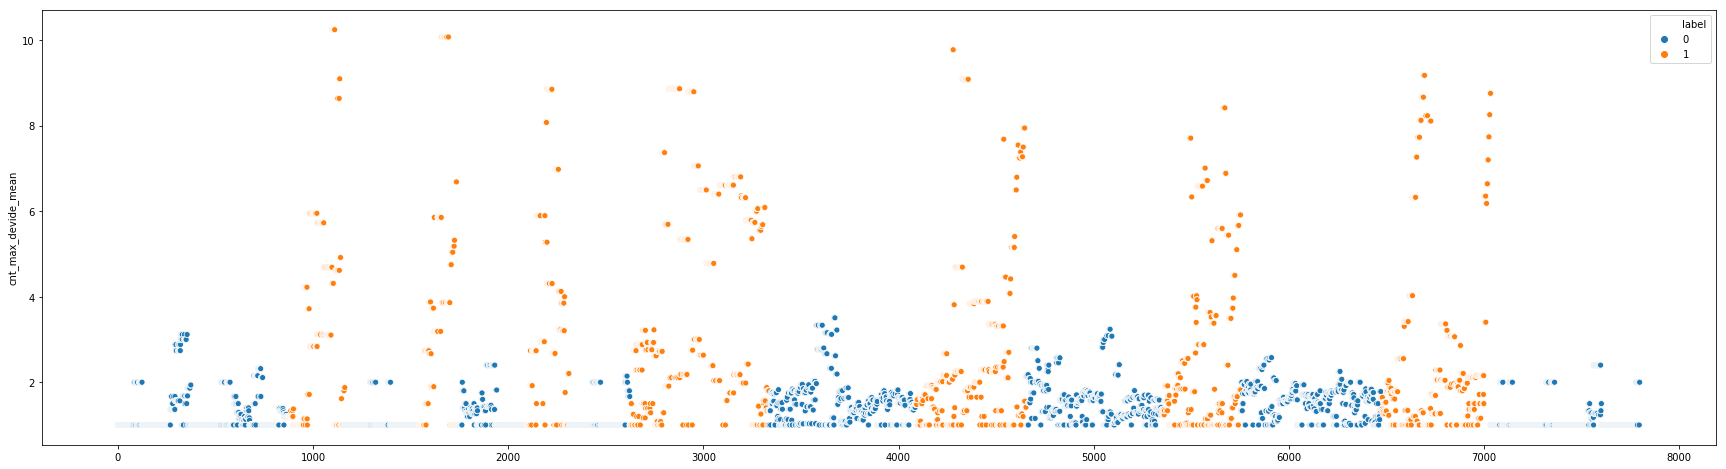

In [31]:
sns.scatterplot(x=range(len(data)), y = data., hue=data.label)

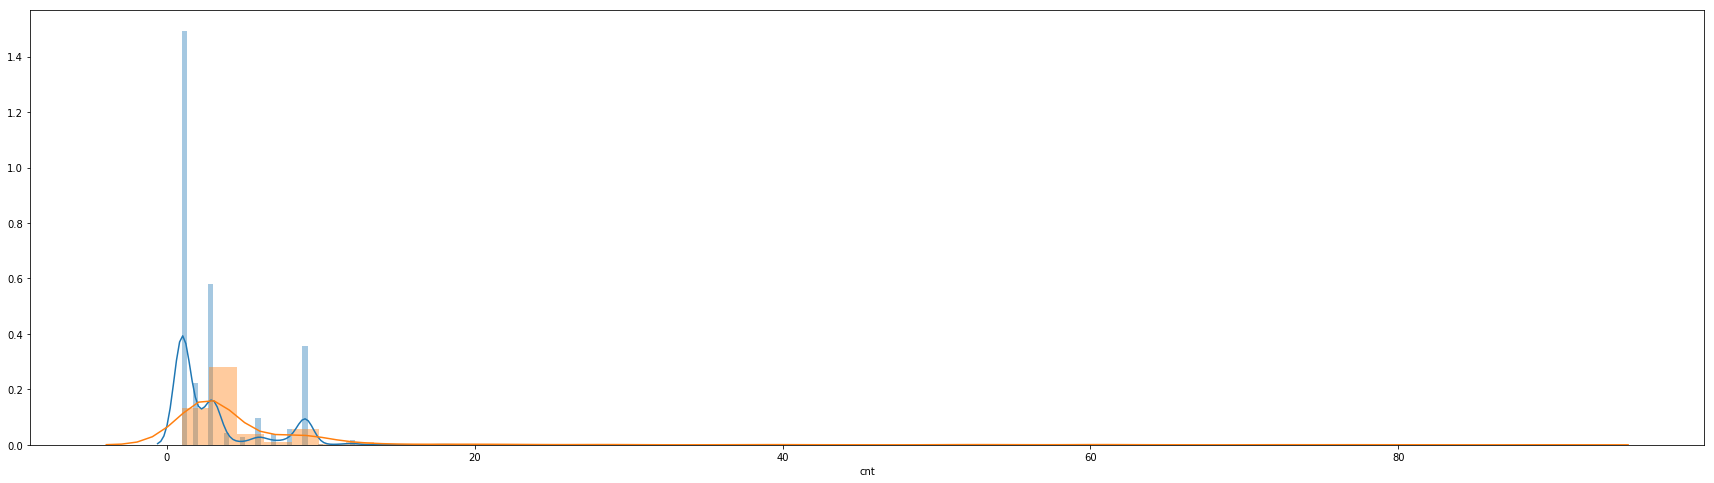

In [27]:
sns.distplot(data[data.label == 0].cnt)
sns.distplot(data[data.label == 1].cnt)

### 모델

##### Model 1 - KMeans

In [12]:
X = data.loc[:,['cnt_max_devide_mean', 'cnt_max']]

In [13]:
X.cnt_max_devide_mean = minmax_scale(X.cnt_max_devide_mean)
X.cnt_max = minmax_scale(X.cnt_max)

In [14]:
model1 = KMeans(n_clusters=2, algorithm='auto', random_state = 10).fit(X)

In [15]:
data['kmeans'] = model1.predict(X)

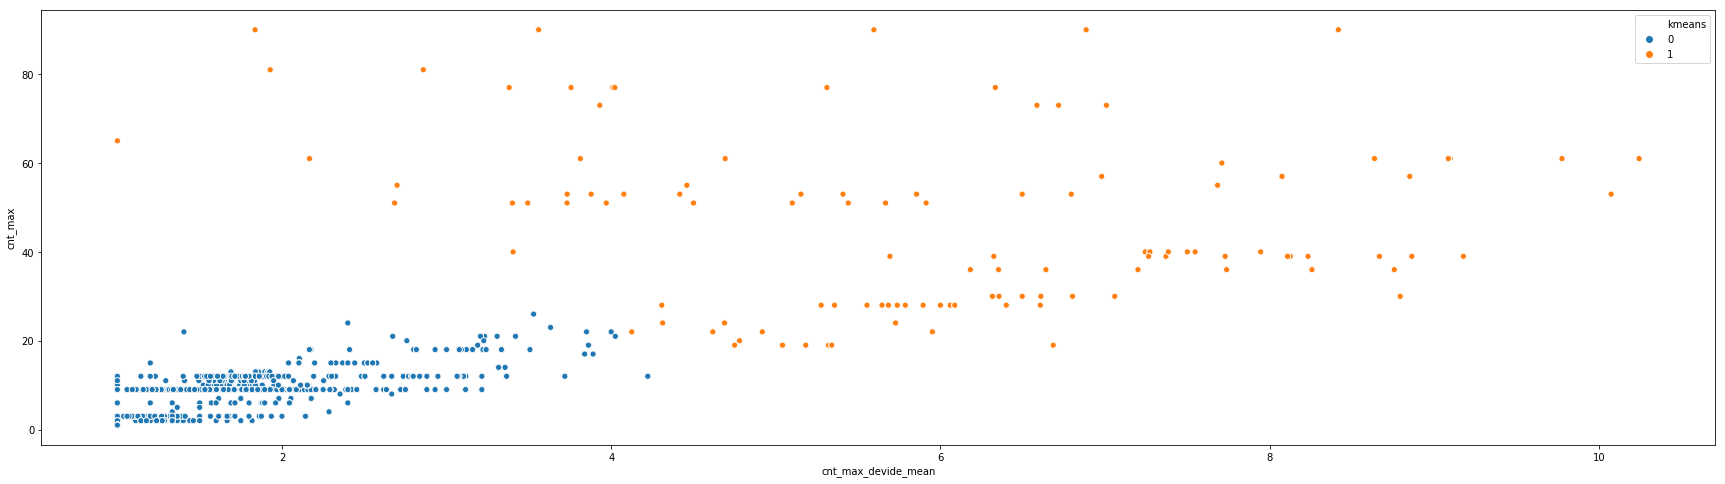

In [16]:
sns.scatterplot(x=data.cnt_max_devide_mean, y=data.cnt_max, hue=data.kmeans)

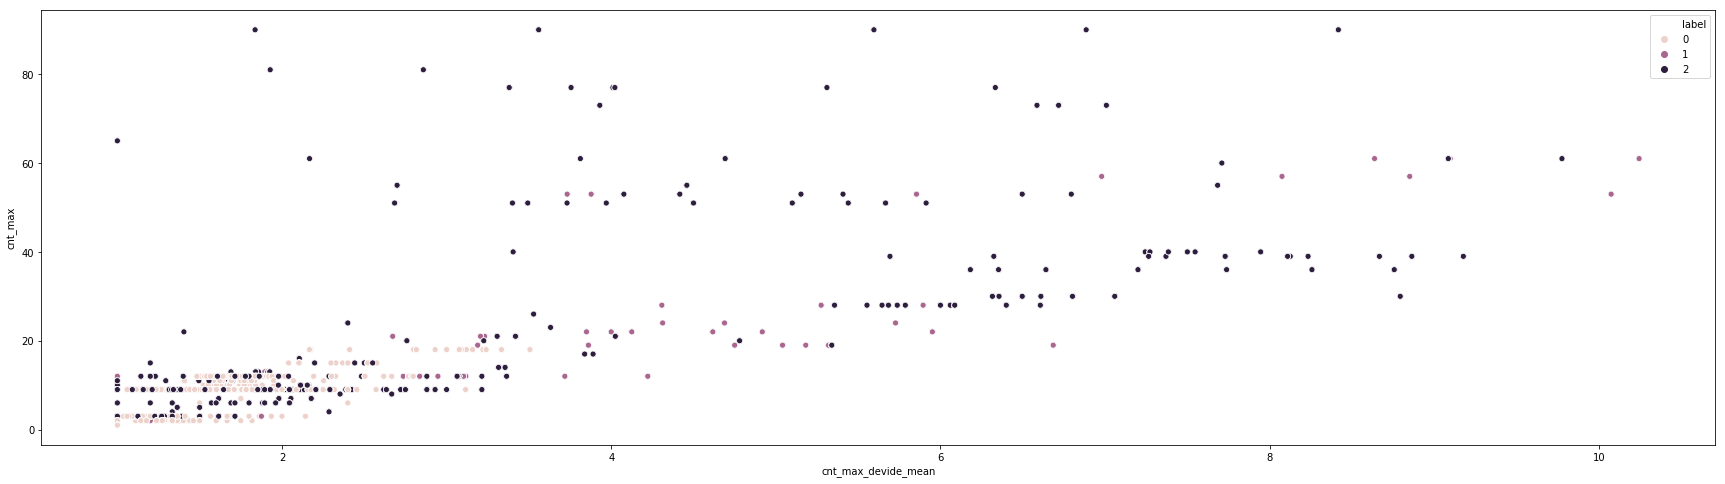

In [17]:
sns.scatterplot(x=data.cnt_max_devide_mean, y=data.cnt_max, hue=data.label)

##### Model 2 - KMeans

##### 영상데이터만 가져오기

In [18]:
data = data[data.kmeans == 1]

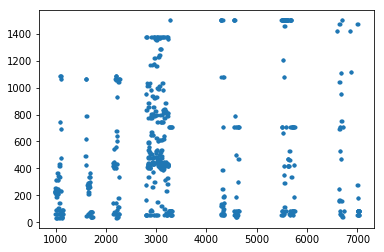

In [23]:
data.len.plot(style='.')

##### EDA

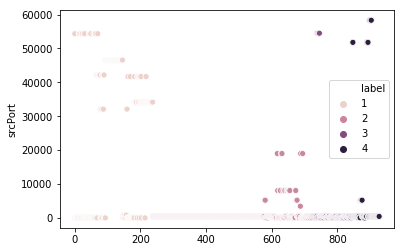

In [134]:
sns.scatterplot(x=range(len(data)), y=data.srcPort, hue=data.label)

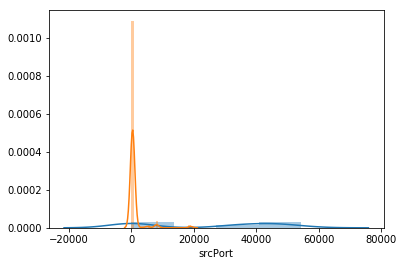

In [137]:
sns.distplot(data[data.label == 1].srcPort)
sns.distplot(data[data.label == 2].srcPort)

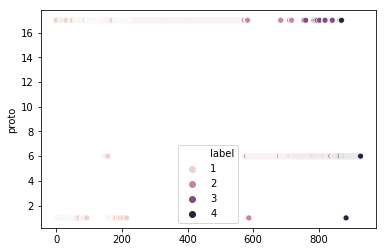

In [138]:
sns.scatterplot(x=range(len(data)), y=data.proto, hue=data.label)

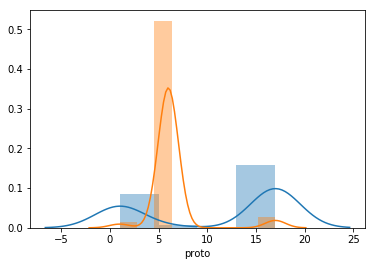

In [141]:
sns.distplot(data[data.label == 1].proto)
sns.distplot(data[data.label == 4].proto)

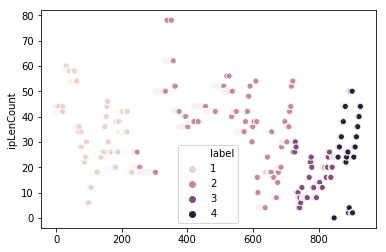

In [142]:
sns.scatterplot(x=range(len(data)), y=data.ipLenCount, hue=data.label)

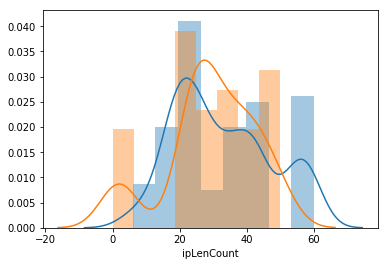

In [144]:
sns.distplot(data[data.label == 1].ipLenCount)
sns.distplot(data[data.label == 4].ipLenCount)

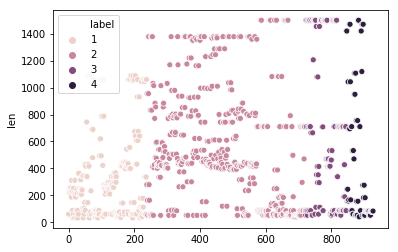

In [145]:
sns.scatterplot(x=range(len(data)), y=data.len, hue=data.label)

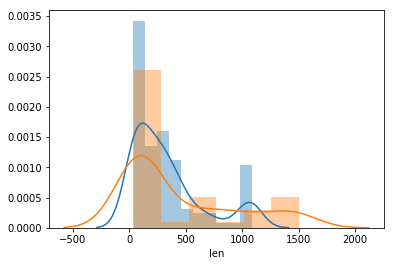

In [147]:
sns.distplot(data[data.label == 1].len)
sns.distplot(data[data.label == 4].len)

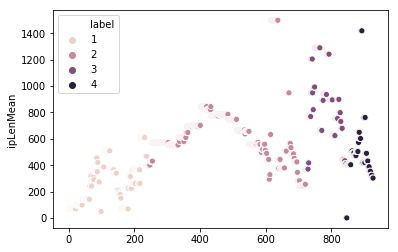

In [148]:
sns.scatterplot(x=range(len(data)), y=data.ipLenMean, hue=data.label)

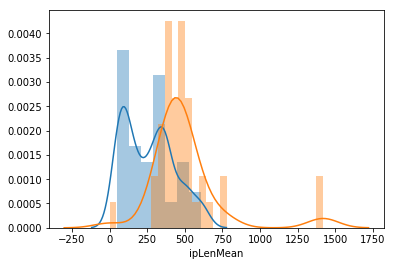

In [150]:
sns.distplot(data[data.label == 1].ipLenMean)
sns.distplot(data[data.label == 4].ipLenMean)

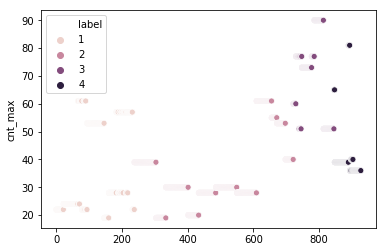

In [151]:
sns.scatterplot(x=range(len(data)), y=data.cnt_max, hue=data.label)

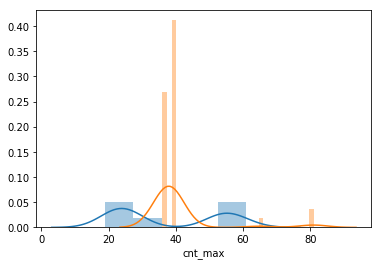

In [153]:
sns.distplot(data[data.label == 1].cnt_max)
sns.distplot(data[data.label == 4].cnt_max)

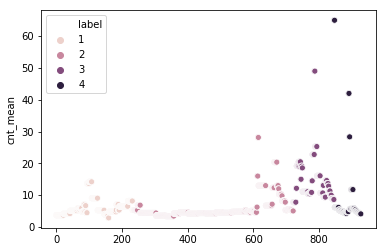

In [154]:
sns.scatterplot(x=range(len(data)), y=data.cnt_mean, hue=data.label)

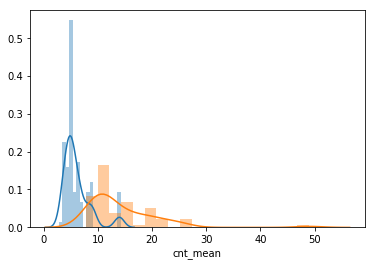

In [157]:
sns.distplot(data[data.label == 1].cnt_mean)
sns.distplot(data[data.label == 3].cnt_mean)

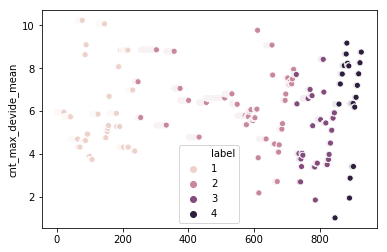

In [158]:
sns.scatterplot(x=range(len(data)), y=data.cnt_max_devide_mean, hue=data.label)

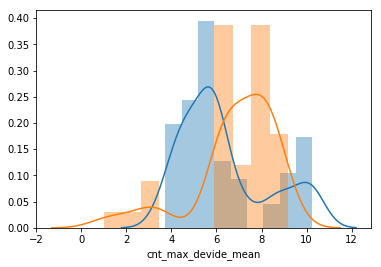

In [161]:
sns.distplot(data[data.label == 1].cnt_max_devide_mean)
sns.distplot(data[data.label == 4].cnt_max_devide_mean)

##### 피처 엔지니어링

In [57]:
data[data.label == 2]

,dstIp,srcPort,dstPort,srcIp,proto,ipLenCount,len,cnt,ipLenMean,timestamp,label,cnt_max,cnt_mean,cnt_max_devide_mean,kmeans,minus_min_max,std


In [19]:
data['minus_min_max'] = data.apply(lambda v: minus_Min_Max(v, data), axis = 1).fillna(0)

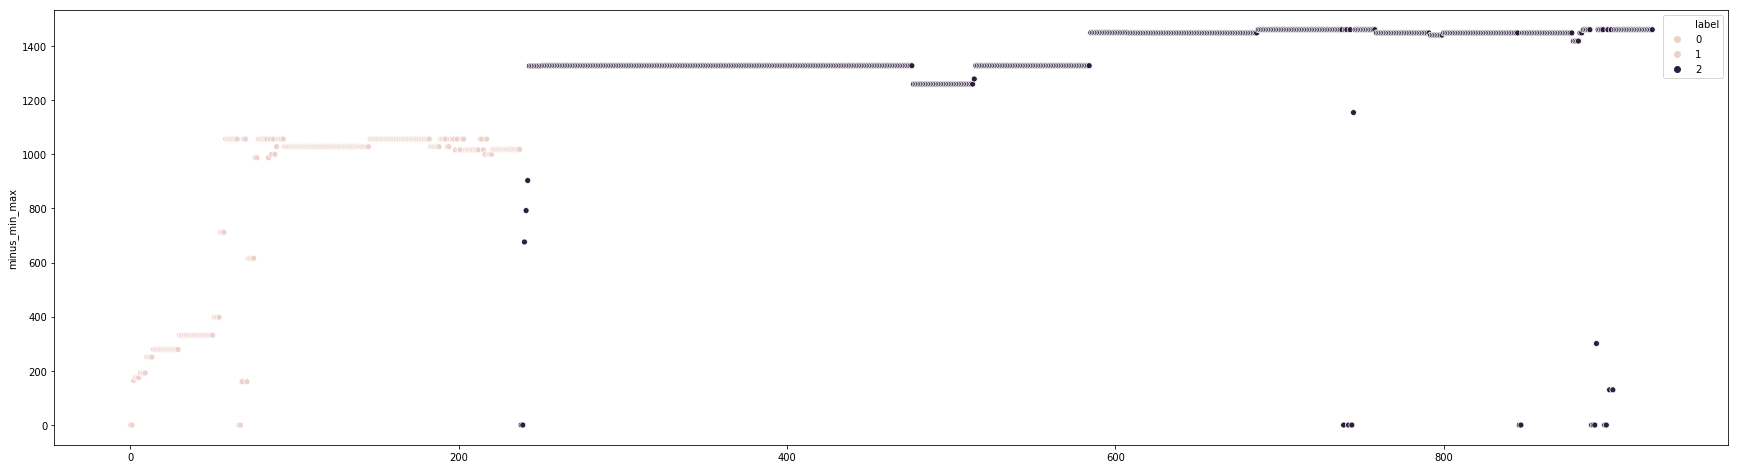

In [20]:
sns.scatterplot(x=range(len(data)), y=data.minus_min_max, hue=data.label)

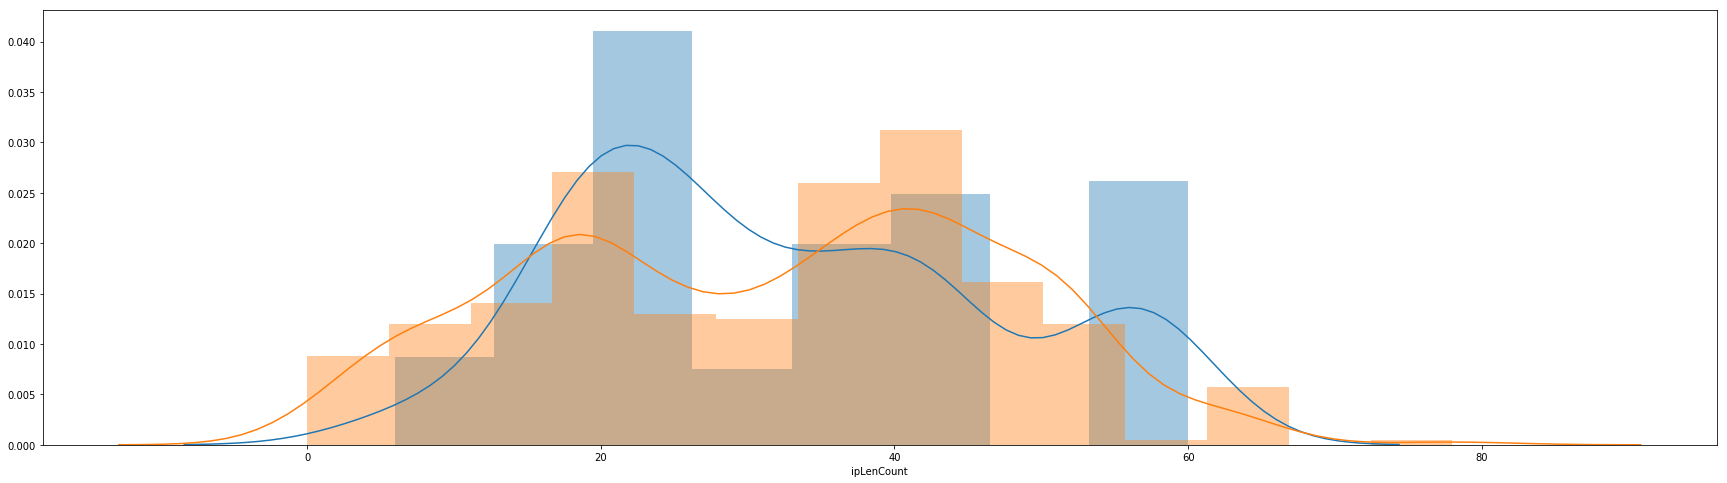

In [31]:
sns.distplot(data[data.label == 1]['ipLenCount'])
sns.distplot(data[data.label == 2]['ipLenCount'])

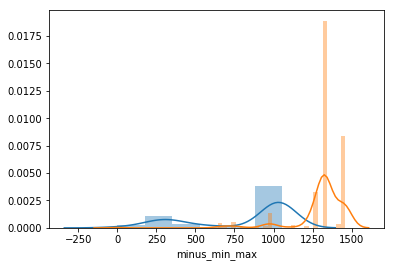

In [231]:
sns.distplot(data[data.label == 1].minus_min_max)
sns.distplot(data[data.label == 2].minus_min_max)

In [24]:
data['std'] = data.apply(lambda v: cal_VAR(v, data), axis = 1).fillna(0)

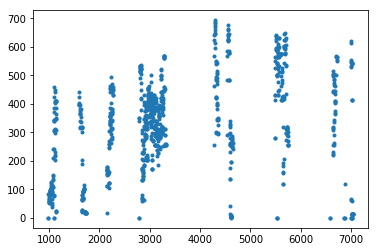

In [215]:
data['std'].plot(style='.')

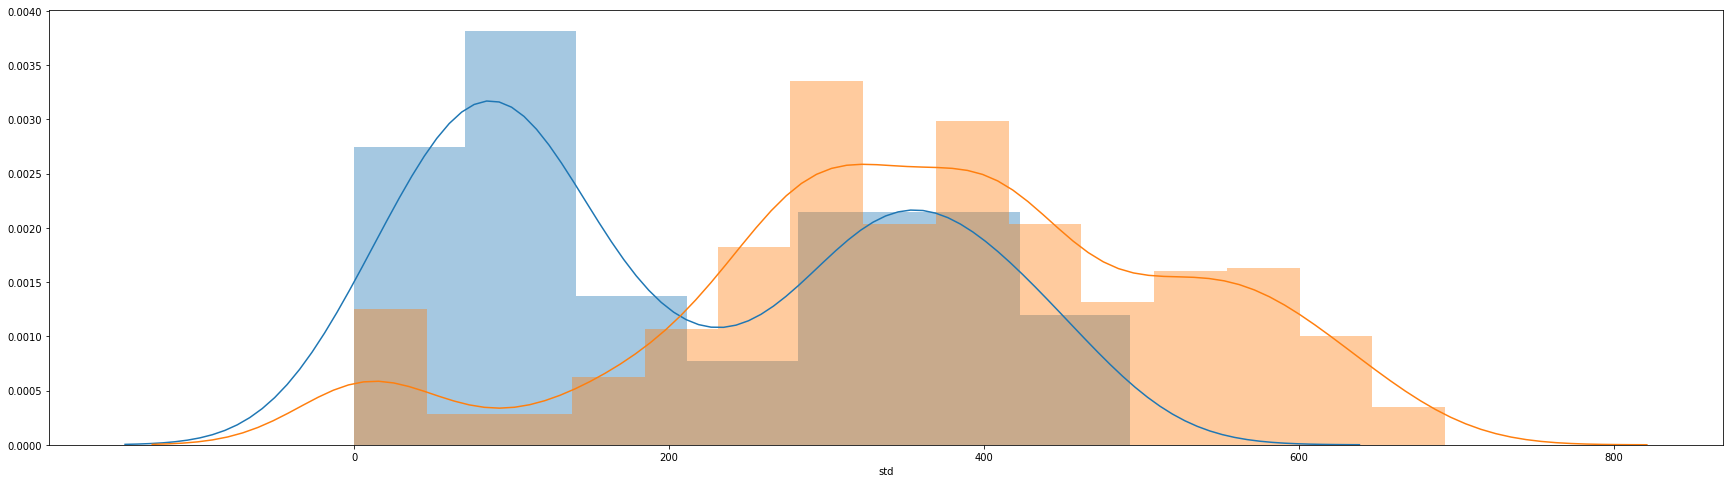

In [29]:
sns.distplot(data[data.label == 1]['std'])
sns.distplot(data[data.label == 2]['std'])

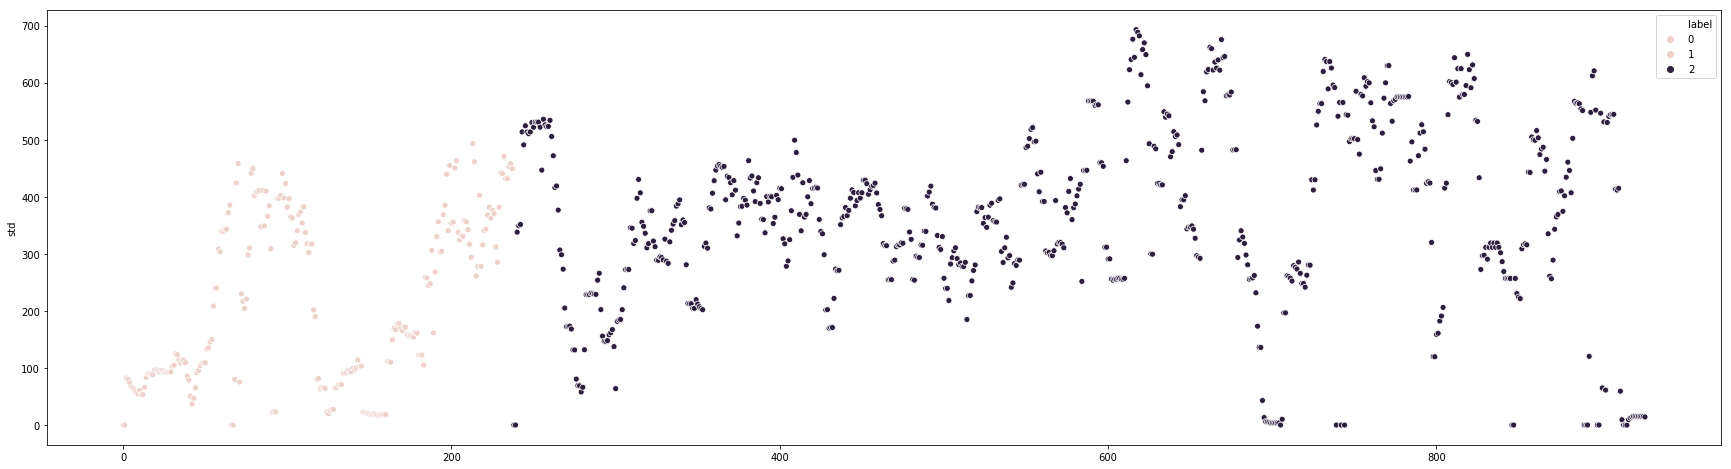

In [25]:
sns.scatterplot(x=range(len(data)), y = data['std'], hue=data.label)

##### test

In [113]:
# features = ['ipLenCount', 'len', 'cnt', 'ipLenMean', 'cnt_max', 'cnt_mean', 'cnt_max_devide_mean', 'minus_min_max', 'std']
features = ['cnt_max_devide_mean', 'cnt', 'minus_min_max', 'std', 'srcPort']

# x = "minus_min_max"
# y = "cnt_max_devide_mean"

##### K means 2

In [114]:
X = data.loc[:,features]

In [115]:
#scaling
for v in features:
    X[v] = minmax_scale(X[v])

In [116]:
model2 = KMeans(n_clusters=2, algorithm='auto', random_state=1).fit(X)

In [117]:
data['kmeans2'] = model2.predict(X) + 1

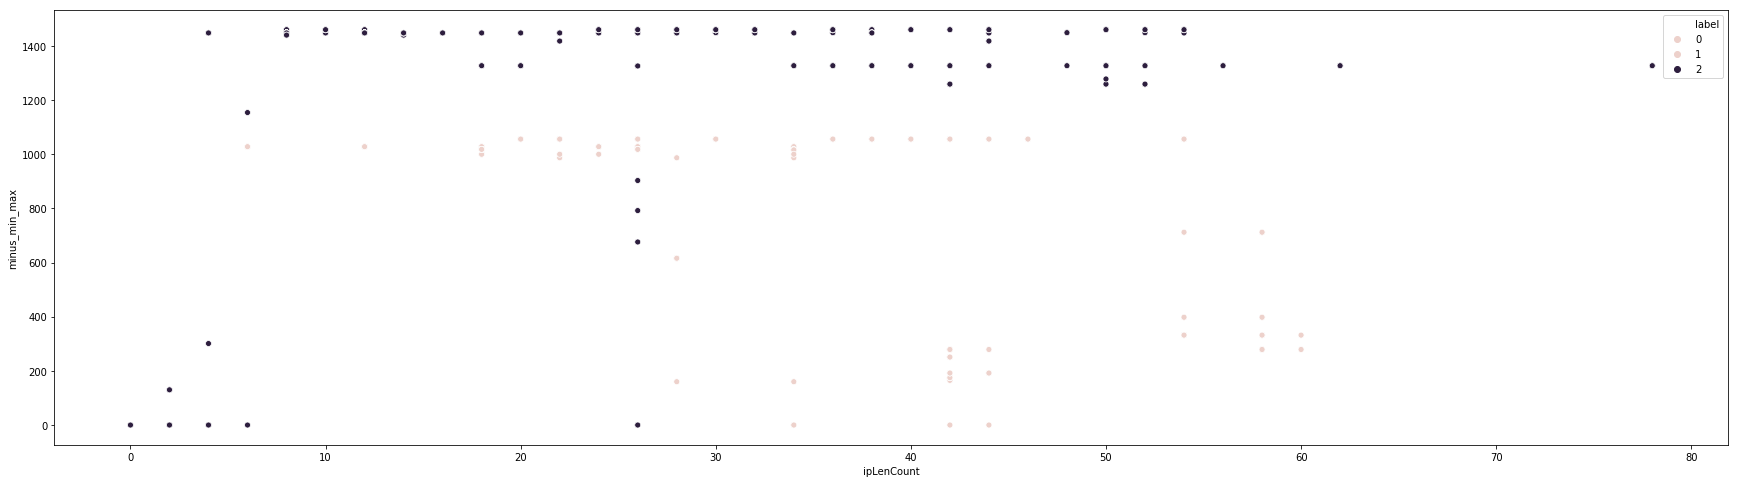

In [118]:
sns.scatterplot(x=data.ipLenCount, y=data.minus_min_max, hue=data.label)

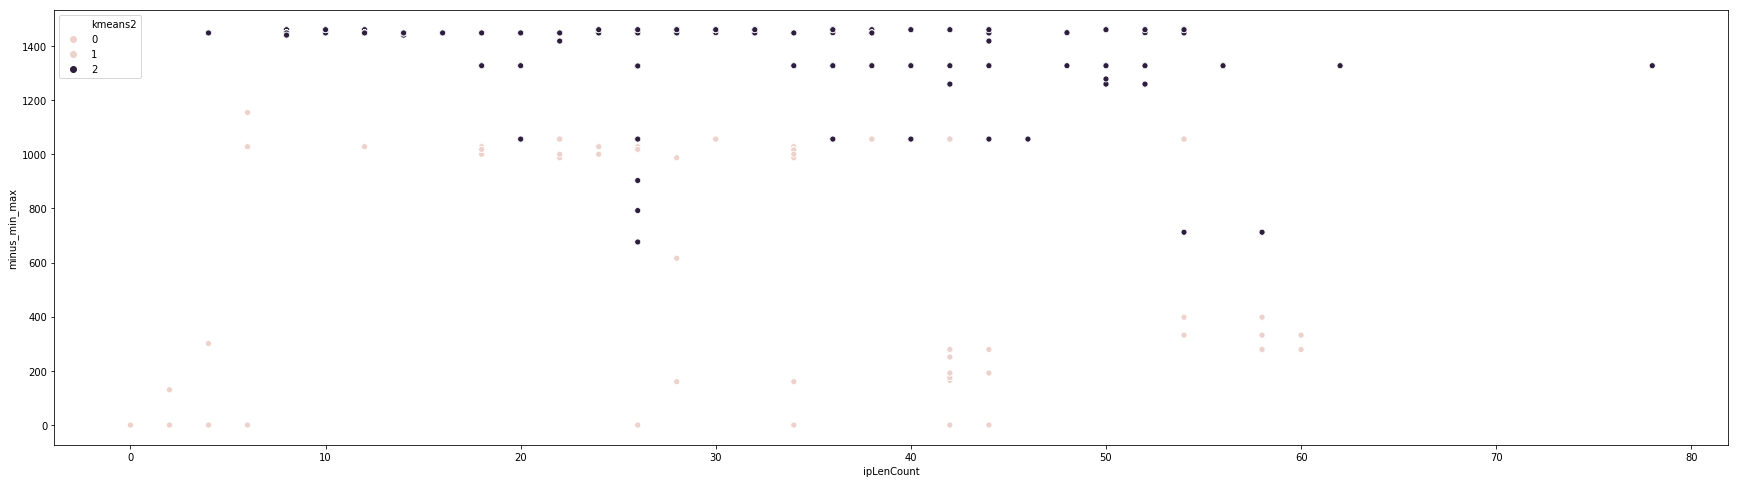

In [119]:
sns.scatterplot(x=data.ipLenCount, y=data.minus_min_max, hue=data.kmeans2)

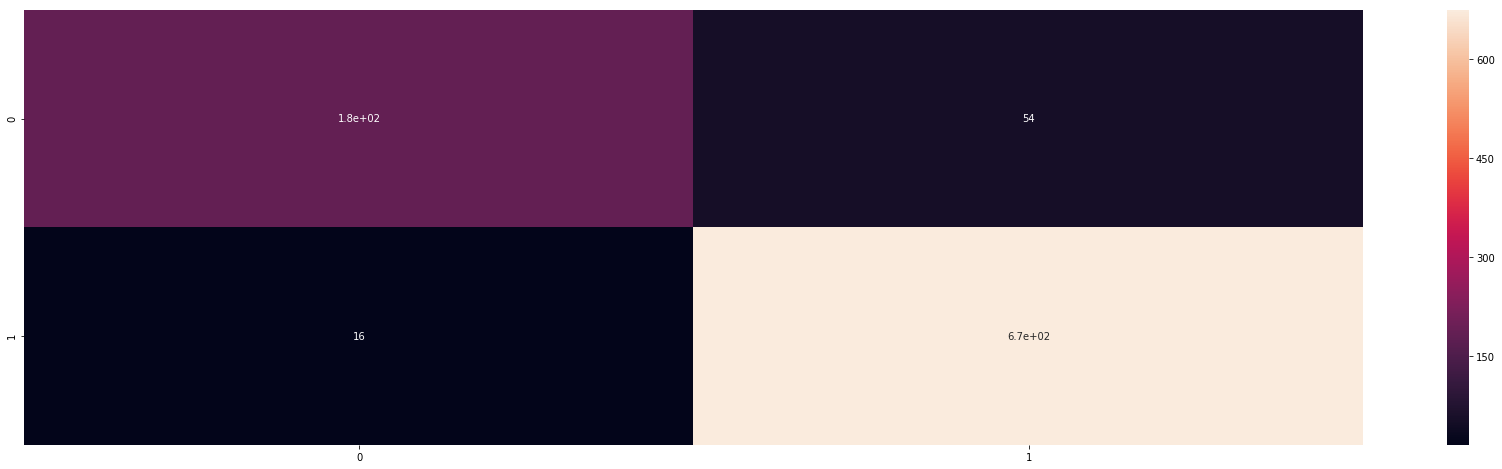

In [120]:
sns.heatmap(confusion_matrix(y_true=data.label, y_pred=data.kmeans2), annot=True)

In [86]:
data['x'] = X_embedded[:,0]
data['y'] = X_embedded[:,1]

In [85]:
X_embedded = TSNE(n_components=2).fit_transform(X)

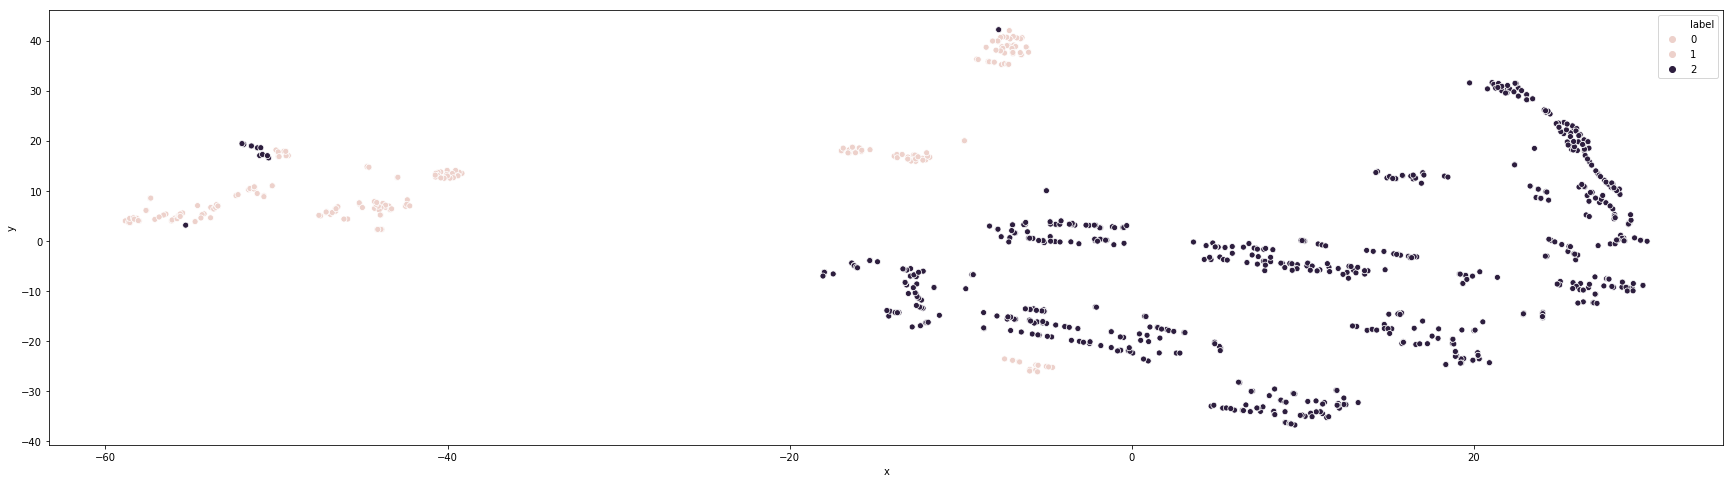

In [87]:
sns.scatterplot(x = data.x, y = data.y, hue=data.label)

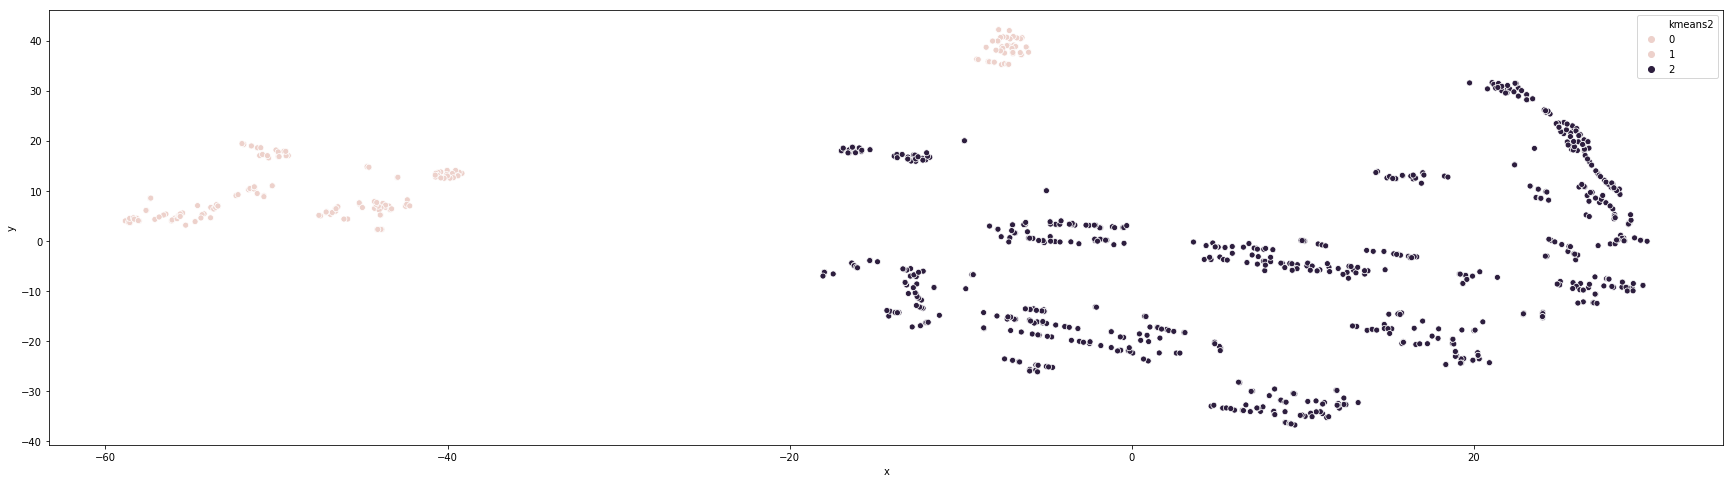

In [88]:
sns.scatterplot(x = data.x, y = data.y, hue=data.kmeans2)

In [89]:
print(classification_report(y_true=data.label, y_pred=data.kmeans2, target_names=['cctv', 'etc']))

             precision    recall  f1-score   support

       cctv       0.92      0.77      0.84       238
        etc       0.93      0.98      0.95       690

avg / total       0.92      0.92      0.92       928



In [33]:
a = np.array([1,2,3,4,5]

In [32]:
a[[1,2,3]]

TypeError: list indices must be integers or slices, not list

In [35]:
a.sample

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [190]:
import random

In [44]:
random.sample(list(a),2)

[2, 3]

In [ ]:
features = ['ipLenCount', 'len', 'cnt', 'ipLenMean', 'cnt_max', 'cnt_mean', 'cnt_max_devide_mean', 'minus_min_max', 'std']
    
i = 1
    
while i < len(features) + 1:
    t = random.sample(features, i)
        

    X = data.loc[:,t]

    #scaling
    for v in t:
        X[v] = minmax_scale(X[v])

    model2 = KMeans(n_clusters=2, algorithm='auto', random_state=10).fit(X)

    data['kmeans2'] = model2.predict(X) + 1

    sns.heatmap(confusion_matrix(y_true=data.label, y_pred=data.kmeans2), annot=True)
    plt.show()

    print(classification_report(y_true=data.label, y_pred=data.kmeans2, target_names=['cctv', 'etc']))
    print(t)
    
    if input() == "next":
        i = i + 1
        continue

In [103]:
# temp1 = data[(data.label == 1) * 1 + (data.label == 2) * 1 == 1]

In [104]:
# sns.scatterplot(x=temp1[x], y=temp1[y], hue=temp1.label)

In [105]:
# temp2 = data[(data.label == 1) * 1 + (data.label == 3) * 1 == 1]

In [106]:
# sns.scatterplot(x=temp2[x], y=temp2[y], hue=temp2.label)

In [107]:
# temp3 = data[(data.label == 1) * 1 + (data.label == 4) * 1 == 1]

In [108]:
# sns.scatterplot(x=temp3[x], y=temp3[y], hue=temp3.label)

In [112]:
for rows in data.itertuples():
    rows
    break